# Introducción.
- ¿Qué es la biodiversidad?
  - Biodiversidad es el nombre que le damos a la variedad de vida en nuestro planeta, que es el resultado de miles de millones de años de evolución. Incluye todas las especies de animales y plantas, y los sistemas naturales que los sustentan.
- Amenazas a la biodiversidad
  - La pérdida de especies de plantas y animales a lo largo del tiempo siempre ha ocurrido, pero el ritmo actual de extinción es aproximadamente 1000 veces mayor que la tasa natural.

  - Las razones de esto incluyen el cambio climático, la contaminación, la destrucción del hábitat, la sobreexplotación de los recursos naturales, la introducción de especies invasoras y el aumento de la agricultura intensiva.

El objetivo de este proyecto es analizar los datos de biodiversidad del Servicio de Parques Nacionales de E.U.A.

Este proyecto  preparará, analizará,  graficará y explicará los hallazgos del análisis.

Aquí hay algunas preguntas que este proyecto ha tratado de responder:

- ¿Ciertos tipos de especies tienen más probabilidades de estar en peligro de extinción?
- ¿Son significativas las diferencias entre especies y su estado de conservación?
- ¿Qué animales se encuentran en peligro de extinción ?

**Fuentes de datos:**

Tanto `Observations.csv` como `Species_info.csv` fueron proporcionados por [Codecademy.com](https://www.codecademy.com).

## Importando modulos de Python

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Cargando datos

In [2]:
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


El dataframe cuenta con 4 varibles cualitativas.

  - Category : nominal.
  - Scientific name: nominal.
  - Common names : nominal.
  - Conservation status: nominal.


In [3]:
obser = pd.read_csv("observations.csv")
obser.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


El dataframe cuenta con 2 varibles cualitativas y 1 variable cualitativa.
- Variables cualitativas
  - Scientific name : nominal.
  - Park name: nominal.
- Variable cuantitativa.
  - Observations : discreta.

#### Características de los datos del dataframe "species"


In [4]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [5]:
species.info()
species.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


(5824, 4)

In [6]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [7]:
info_species = species.describe()

print("La variable category refiere a la taxonomía de las especies y  tiene " + str(info_species.category[1]) + 
      " valores unicos.\n" +
      "La variable scientific name refiere al nombre cientifíco de las especies y tiene " + str(info_species.scientific_name[1])+
      " diferentes tipos.\n" +
      "La variable common names refiere al nombre común de las especies y tiene " + str(info_species.common_names[1])+
       " diferentes tipos.\n"+
      "La variables conservation status tiene " + str(info_species.conservation_status[1]) + " diferentes tiposde status.")

La variable category refiere a la taxonomía de las especies y  tiene 7 valores unicos.
La variable scientific name refiere al nombre cientifíco de las especies y tiene 5541 diferentes tipos.
La variable common names refiere al nombre común de las especies y tiene 5504 diferentes tipos.
La variables conservation status tiene 4 diferentes tiposde status.



 - El data frame cuenta con 5824 observaciones y 4 variables cuantitativas.


#### Características de los datos del dataframe "observations"

In [8]:
obser.info()
obser.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


(23296, 3)

In [9]:
obser.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


#### Características de los datos del dataframe "obser"
De lo anterior podemos saber lo siguiente:
 - El data frame cuenta con 23296 observaciones y 3 variables cuantitativas.
 - No existen valores nulos.

## Explorando datos.

In [10]:
print(f"Diferentes tipos de categorias de especies:{species.category.unique()}")

Diferentes tipos de categorias de especies:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [11]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [12]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

Con la información anterior sabemos que hay especies que no tienen intervención para cuidar la especie. Por lo cual se reemplaza todos los Nan por "No intervention"

In [13]:
species.fillna("No Intervention", inplace=True)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [14]:
species.scientific_name.duplicated().value_counts()

False    5541
True      283
Name: scientific_name, dtype: int64

In [15]:
species.common_names.duplicated().value_counts()

False    5504
True      320
Name: common_names, dtype: int64

In [16]:
rep=species.scientific_name.value_counts()

In [17]:
nombre_rep=[]
num_rep =[]
for i in range(0, len(rep)):
    if rep[i] != 1:
        nombre_rep.append(rep.index[i])
        num_rep.append(rep[i])

repetidos = pd.DataFrame(list(zip(nombre_rep,num_rep)), columns = ['scientific_name','#_veces_repetido'])
repetidos.head(10)

,scientific_name,#_veces_repetido
0,Castor canadensis,3
1,Canis lupus,3
2,Hypochaeris radicata,3
3,Columba livia,3
4,Puma concolor,3
5,Streptopelia decaocto,3
6,Holcus lanatus,3
7,Myotis lucifugus,3
8,Procyon lotor,3
9,Setaria viridis,2


Hay nombres cientifícos de especies que se repiten por lo cual se procede a verificar si tienen nombres comunes o esatus diferentes para solo quedarnos con un registro y cuando se realice el JOIN (merge en Python) con el dataframe observaciones no exista información redundante.
- 274 especies repetidas:
 - 265 especies repetidas 2 veces.
 - 9 especies repetidas 3 veces.

In [18]:
indices=[]
for i in range(0,len(repetidos)):
    for j in range(0,len(species.index[(species["scientific_name"] == repetidos["scientific_name"][i])])):
        indices.append(species.index[(species["scientific_name"] == repetidos["scientific_name"][i])][j])


In [19]:
especies_repetidas = []
for i in indices:
    especies_repetidas.append(list(species.iloc[i,:]))
    

In [20]:
especies_repetidas = pd.DataFrame(especies_repetidas, columns = ["category","scientific_name","common_names","conservation_status"])
especies_repetidas.sort_values("scientific_name",ascending=True)

,category,scientific_name,common_names,conservation_status
455,Vascular Plant,Agrostis capillaris,Rhode Island Bent,No Intervention
456,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",No Intervention
458,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",No Intervention
457,Vascular Plant,Agrostis gigantea,Redtop,No Intervention
451,Vascular Plant,Agrostis mertensii,Northern Agrostis,No Intervention
...,...,...,...,...
94,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",No Intervention
92,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",No Intervention
91,Vascular Plant,Vulpia octoflora,Annual Fescue,No Intervention
30,Vascular Plant,Zizia aptera,"Heartleaf Alexanders, Heart-Leaf Alexanders, M...",No Intervention


Como se observa hay registros que se repiten porque en diferentes regiones tienen nombres comunes diferentes pero las variables realmente importantes es el nombre científico y el estatus de su conservación. Se procede a verificar que cada especie cuente con un solo estatus.

In [21]:
especies_repetidas.groupby("scientific_name").nunique().sort_values("conservation_status",ascending=False).head()

,category,common_names,conservation_status
scientific_name,,,
Canis lupus,1,2,2
Oncorhynchus mykiss,1,1,2
Panicum rigidulum var. rigidulum,1,2,1
Parietaria pensylvanica,1,2,1
Passerella iliaca,1,2,1


Debido a que hay dos registros con estatus de conservación diferentes asignamos prioridades:
 - 1: Endangered             
 - 2: Threatened             
 - 3: Species of Concern    
 - 4: In Recovery
 - 5: No intervention

Se dajará el registro con el estatus más crítico.

In [22]:
especies_repetidas["priority"] = 0
for i in range(0,len(especies_repetidas)):
    if especies_repetidas.iloc[i,3] == "Endangered":
        especies_repetidas.iloc[i,4] = 1
    elif especies_repetidas.iloc[i,3] == "Threatened":
        especies_repetidas.iloc[i,4] = 2
    elif especies_repetidas.iloc[i,3] == "Species of Concern":
        especies_repetidas.iloc[i,4] = 3
    elif especies_repetidas.iloc[i,3] == "In Recovery":
        especies_repetidas.iloc[i,4] = 4
    else:
        especies_repetidas.iloc[i,4] = 5
                

In [23]:
especies_repetidas =especies_repetidas.sort_values(by = ["scientific_name","priority"],ascending= [True,True])
especies_repetidas=especies_repetidas.reset_index(drop=True)
especies_repetidas

,category,scientific_name,common_names,conservation_status,priority
0,Vascular Plant,Agrostis capillaris,Rhode Island Bent,No Intervention,5
1,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",No Intervention,5
2,Vascular Plant,Agrostis gigantea,Redtop,No Intervention,5
3,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",No Intervention,5
4,Vascular Plant,Agrostis mertensii,Northern Agrostis,No Intervention,5
...,...,...,...,...,...
552,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",No Intervention,5
553,Vascular Plant,Vulpia octoflora,Annual Fescue,No Intervention,5
554,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",No Intervention,5
555,Vascular Plant,Zizia aptera,Golden Alexanders,No Intervention,5


Con lo anterior aseguramos que cuando se aplique el .drop por default conserva los primeros registros y le vamos a dar prioridad a las especies que se encuentran en peligro.

In [24]:
z = especies_repetidas.drop_duplicates(subset=['scientific_name'])
z = z.reset_index(drop=True)
z = z.drop(['priority'], axis=1)
z

,category,scientific_name,common_names,conservation_status
0,Vascular Plant,Agrostis capillaris,Rhode Island Bent,No Intervention
1,Vascular Plant,Agrostis gigantea,Redtop,No Intervention
2,Vascular Plant,Agrostis mertensii,Northern Agrostis,No Intervention
3,Vascular Plant,Agrostis scabra,"Rough Bentgrass, Rough Hairgrass",No Intervention
4,Vascular Plant,Agrostis stolonifera,Creeping Bentgrass,No Intervention
...,...,...,...,...
269,Bird,Vireo solitarius,"Blue-Headed Vireo, Solitary Vireo",No Intervention
270,Vascular Plant,Vulpia bromoides,Fescue,No Intervention
271,Vascular Plant,Vulpia myuros,Rattail Fescue,No Intervention
272,Vascular Plant,Vulpia octoflora,Annual Fescue,No Intervention


In [25]:
species.drop(indices, axis=0, inplace=True)
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
7,Mammal,Canis latrans,Coyote,Species of Concern
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention


Se eliminan las observaciones que están repetidos y concatenamos el dataframe con datos limpios.

In [26]:
species = pd.concat([species, z])

In [27]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
7,Mammal,Canis latrans,Coyote,Species of Concern
...,...,...,...,...
269,Bird,Vireo solitarius,"Blue-Headed Vireo, Solitary Vireo",No Intervention
270,Vascular Plant,Vulpia bromoides,Fescue,No Intervention
271,Vascular Plant,Vulpia myuros,Rattail Fescue,No Intervention
272,Vascular Plant,Vulpia octoflora,Annual Fescue,No Intervention


In [28]:
species.scientific_name.duplicated().value_counts()

False    5541
Name: scientific_name, dtype: int64

Se asegura que el Dataframe species no tenga registros repetidos que causen un doble conteo de observations cuando
se realice el merge y como consecuencia no se consluya con un análisis erróneo. 
(Se dieron prioridad a los registros de las especies que tienen un estatus de conservación crítico.)

In [29]:
print(f"Número de observaciones: {obser.observations.sum()}")

Número de observaciones: 3314739


In [30]:
obser.scientific_name.duplicated().value_counts()

True     17755
False     5541
Name: scientific_name, dtype: int64

En el dataframe existen duplicados pero las especies se encuentran en diferentes parques y cuando hagamos el análisis 
de parques y nombres cientifícos de especies se pueden agrupar.

## Análisis.

In [42]:
all_data =pd.merge(obser,species, on='scientific_name', how='left')
all_data

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention
...,...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,No Intervention
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,No Intervention
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,No Intervention
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,No Intervention


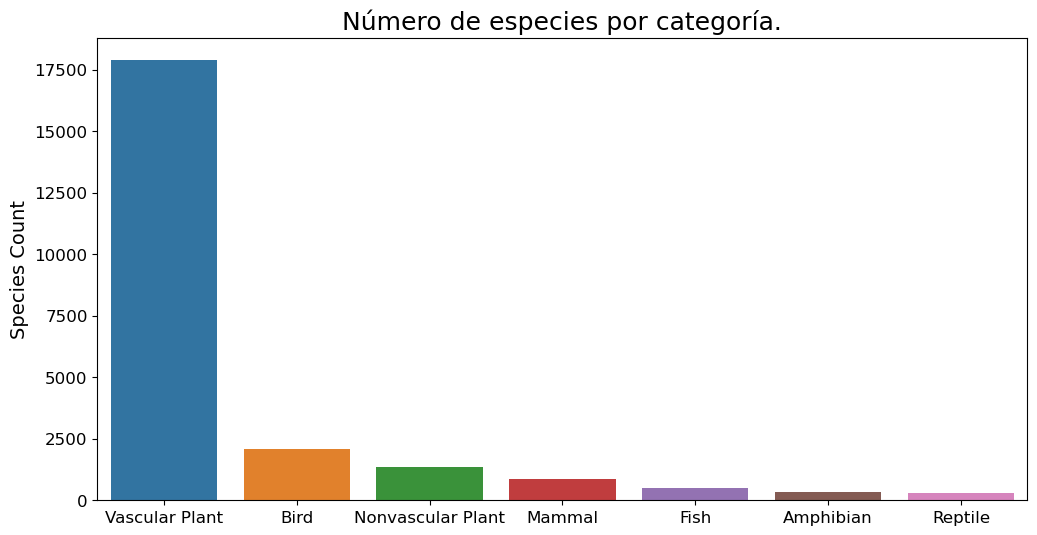

In [32]:
category_species_count = all_data.groupby('category')[['scientific_name']].count()
category_species_count.rename({'scientific_name': 'scientific_name_count'}, inplace= True, axis= 1)

plt.subplots(figsize= (12, 6)) 
plt.ticklabel_format(style= 'plain', axis= 'y')
sns.barplot(data= category_species_count, x= category_species_count.index, y= 'scientific_name_count', 
            order= category_species_count.sort_values('scientific_name_count', ascending= False).index)
plt.title("Número de especies por categoría.",fontsize=18)
plt.xlabel('')
plt.ylabel('Species Count', fontsize= 14)
plt.xticks(fontsize= 12);
plt.yticks(fontsize= 12);
plt.savefig('Num_esp_cat.png', dpi= 600)

In [33]:
all_data.groupby('category')[['scientific_name']].count()

,scientific_name
category,
Amphibian,320
Bird,2084
Fish,508
Mammal,856
Nonvascular Plant,1332
Reptile,316
Vascular Plant,17880


- Con el gráfico anterior se puede concluir que hay muchas especies que pertenecen a la catergoria "Vascular Plant" por otro lado se cuentan con mucho menos especies de pescados, anfibios y reptiles; hay que tener en cuenta que para tener este tipo de animales se requiere mucho más presupuesto y a veces espacio amplio que puede ser no benefico para estas especies. 
- Por ello se estudiará si estas animales con pocas especies en parques están en peligro.
- Vascular Plant aunque tienen mayor número de especies puede que algunas de ellas también se encuentren en peligro.

Text(0.5, 1.0, 'Número de observaciones por categoría en cada parque.')

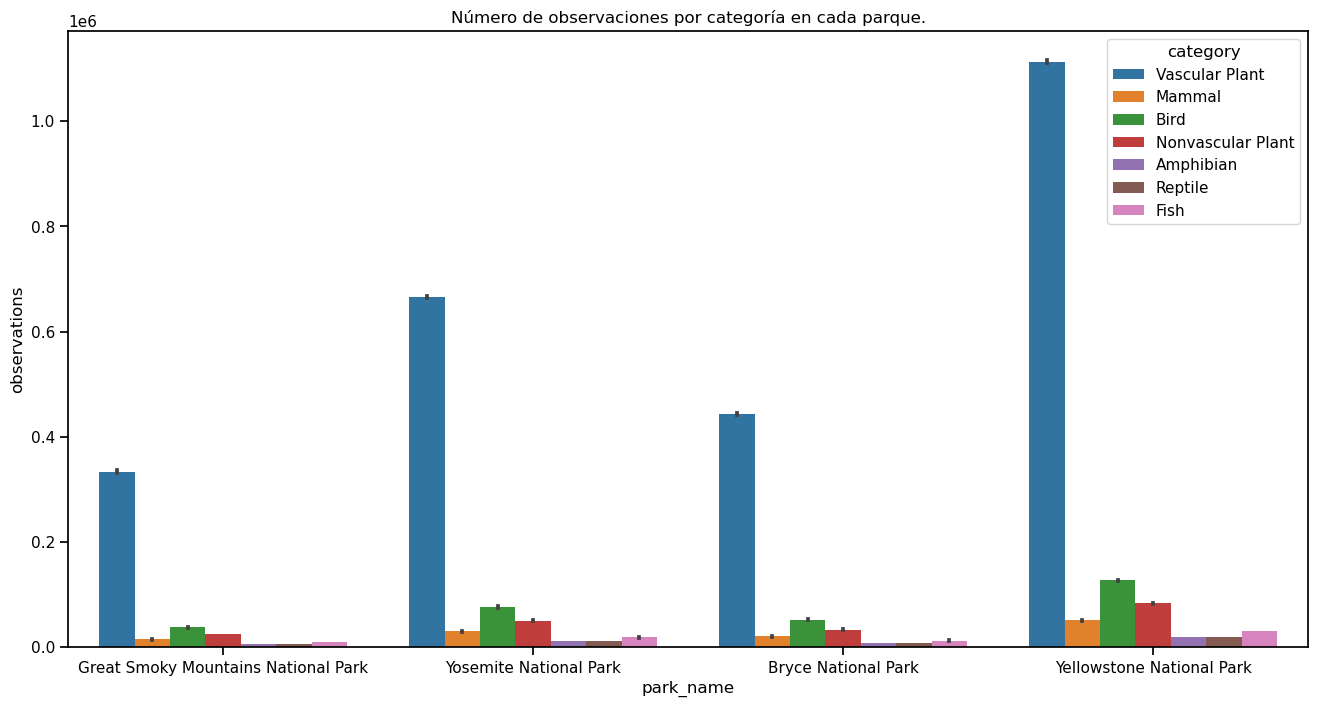

In [34]:
order = list(all_data.park_name.unique())
sns.set_context('notebook')
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='park_name', y='observations', data=all_data, hue='category', estimator=np.sum, order=order)
plt.title('Número de observaciones por categoría en cada parque.')

El parque "Yellostone National Park" cuenta con más ejemplares, seguido por "Yosemite National Park" , "Bryce National Park" y por último "Great Smoky". Se estudiará qué parque tiene mayor número de especies es riesgo.

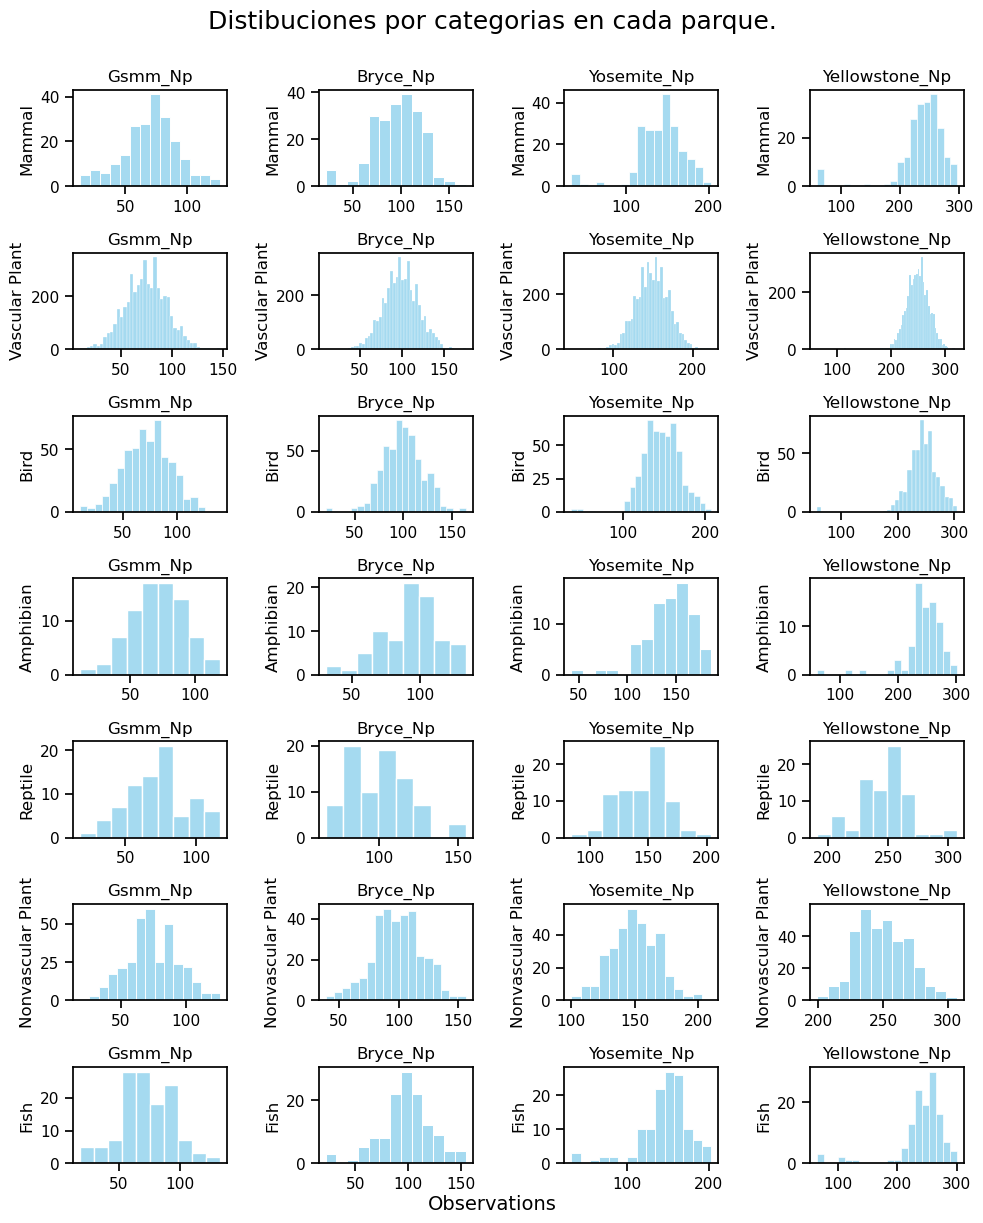

In [35]:
renamed_parks = all_data.replace({'Bryce National Park': 'Bryce_NP',
                               'Great Smoky Mountains National Park': 'GSMM_NP',
                               'Yosemite National Park': 'Yosemite_NP',
                               'Yellowstone National Park': 'Yellowstone_NP'})

categories = ['Mammal', 'Vascular Plant', 'Bird', 'Amphibian', 'Reptile', 'Nonvascular Plant', 'Fish']
parks = ['GSMM_NP', 'Bryce_NP', 'Yosemite_NP', 'Yellowstone_NP']

fig = plt.figure(figsize=(10, 12))
plt.subplots_adjust(hspace= 0.40, wspace= 0.40)
plt.suptitle('Distibuciones por categorias en cada parque.', fontsize=18, y=1)
fig.text(0.5, 0.005, 'Observations', ha="center", va='center', fontsize=14)

i = 0

for m, category in enumerate(categories, 1):
    for n, park in enumerate(parks, 1):
           
        i = i + 1
        ax = plt.subplot(7, 4, i)
        
     
        plot_data = all_data[(renamed_parks.category == category) & (renamed_parks.park_name == park)]
        sns.histplot(x= 'observations', data=plot_data, color='skyblue', edgecolor='white')

  
        ax.set_title(park.title())
        ax.set_xlabel('')
        ax.set_ylabel(category.title())
                
fig.tight_layout()
plt.savefig('Cat_par.png', dpi= 600)

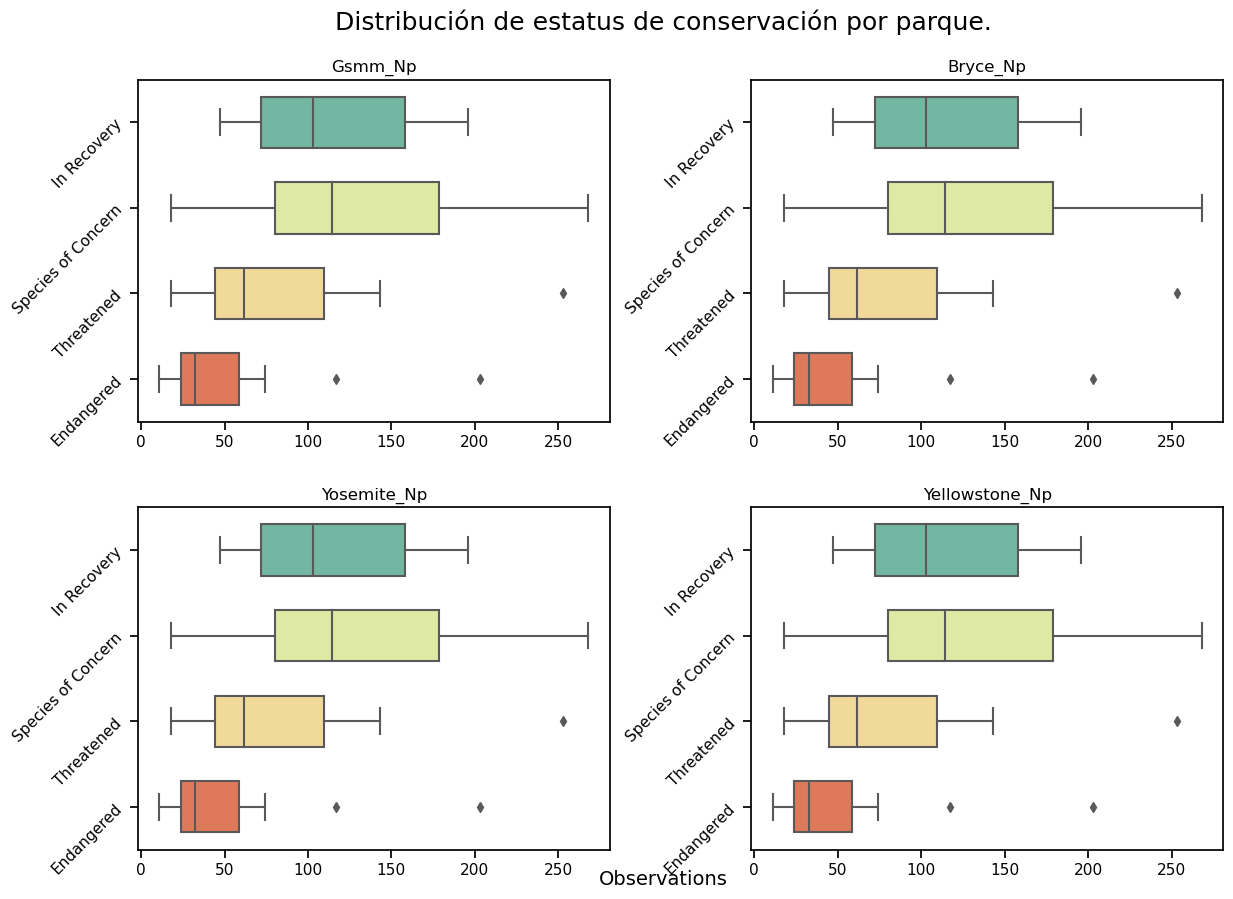

In [36]:
parks = ['GSMM_NP', 'Bryce_NP', 'Yosemite_NP', 'Yellowstone_NP']

fig = plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace= 0.25, wspace= 0.30)
plt.suptitle('Distribución de estatus de conservación por parque.', fontsize=18, y=0.95)
fig.text(0.5,0.08, 'Observations', ha="center", va='center', fontsize=14)


for n, park in enumerate(parks):
    
    ax = plt.subplot(2, 2, n + 1)


    bio_df_park = renamed_parks.loc[(renamed_parks.park_name == park)]
    sns.boxplot(data=all_data, x= 'observations', y= 'conservation_status', width= 0.6, order= ['In Recovery',
                                                                                            'Species of Concern',
                                                                                            'Threatened',
                                                                                            'Endangered'], palette= 'Spectral_r')

    ax.set_title(park.title())
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.yticks(rotation = 45)



Los parques tiene aproximadamente el mismo número de especies en peligro de extinción, así como también oscilan a tener el mismo número de: mamiferos, pájaros, anfibios, reptiles y pescados.

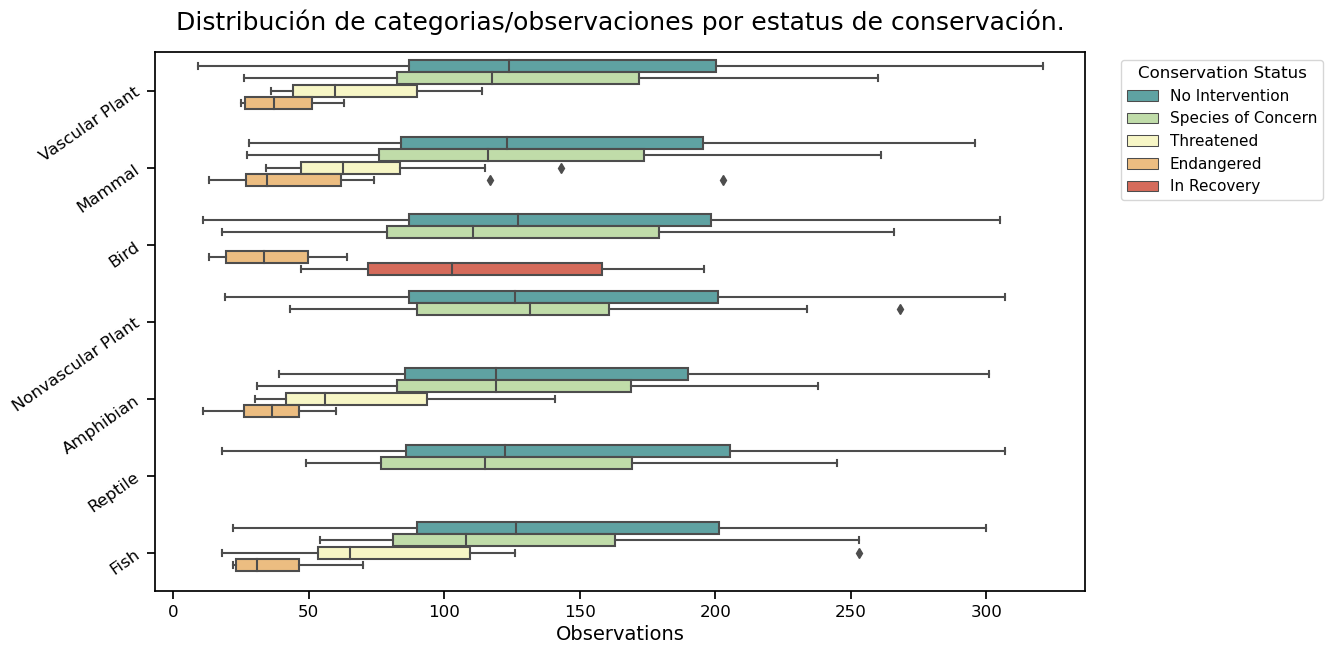

In [37]:
fig = plt.figure(figsize=(12, 7))
plt.subplots_adjust(hspace= 0.25, wspace= 0.30)
plt.title('Distribución de categorias/observaciones por estatus de conservación.', fontsize=18, y=1.025)


ax = sns.boxplot(data= renamed_parks, x= 'observations', y= 'category', hue= 'conservation_status', width= 0.8, palette= 'Spectral_r')


ax.set_ylabel('')
ax.set_xlabel('')
plt.xlabel('Observations', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.yticks(rotation = 35)
plt.legend(title= 'Conservation Status', bbox_to_anchor=(1.03,1), loc="upper left") 



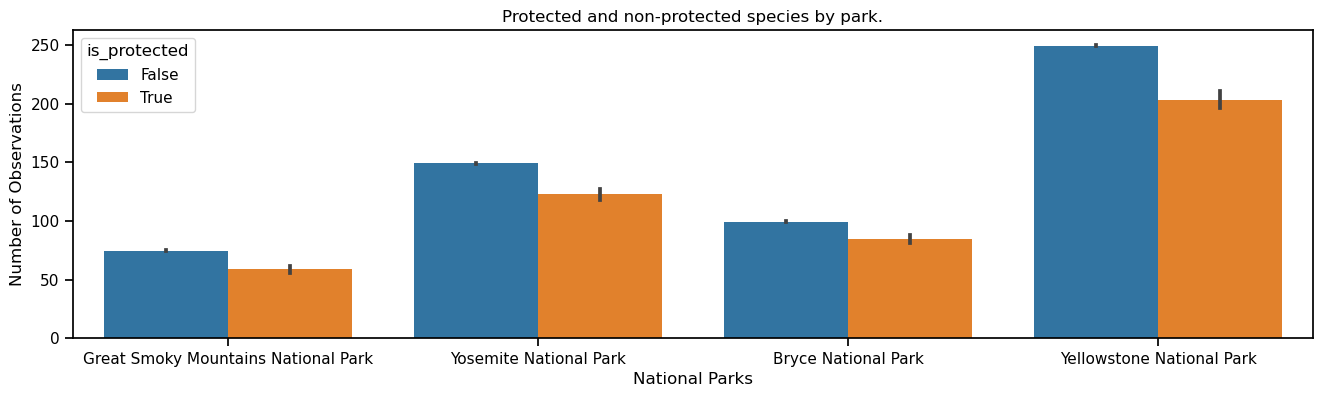

In [38]:
all_data['is_protected'] = all_data.conservation_status != 'No Intervention'
plt.figure(figsize=(16, 4))
sns.barplot(x=all_data.park_name, y= all_data.observations, hue=all_data.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Protected and non-protected species by park.')
plt.show()

In [39]:
index_endangered=list(all_data.index[(all_data["conservation_status"] == "Endangered")])

In [40]:
species_endangered = []
for i in index_endangered:
    species_endangered.append(list(all_data.iloc[i,:]))

In [45]:
species_endangered = pd.DataFrame(species_endangered, columns = ["scientific_name","park_name","observations","category","common_names","conservation_status","is_protected"])
species_endangered = species_endangered.sort_values("observations",ascending=True)

## Conclusiones

- ¿Ciertos tipos de especies tienen más probabilidades de estar en peligro de extinción?
     - Mamíferos y Aves tuvieron el mayor porcentaje de estar en protección.
- ¿Son significativas las diferencias entre especies y su estado de conservación?
     - Mientras que los mamíferos y las aves no tuvieron una diferencia significativa en el porcentaje de conservación, las plasntas no vasculares y los reptiles exhibieron una diferencia estadísticamente significativa.
- ¿Qué animales que están en los parques se encuentran en peligro de extinción ?
    - A continuación se presentan las especies que se encuentran en peligro de extinción y los ejemplares que existen en todos los parques.



In [46]:
species_endangered.groupby("scientific_name").sum().sort_values("observations",ascending=True)


,observations,is_protected
scientific_name,,
Grus americana,131,0.0
Canis rufus,137,0.0
Vermivora bachmanii,141,0.0
Noturus baileyi,143,0.0
Rana sierrae,144,0.0
Myotis sodalis,145,0.0
Chasmistes liorus,146,0.0
Picoides borealis,146,0.0
Glaucomys sabrinus coloratus,153,0.0
